# Ch7 处理文本数据

In [1]:
# Common imports
import pandas as pd
import numpy as np

# To plot figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

## 7.1 用字符串表示的数据类型

可能遇到的四种类型的字符串数据：
+ 分类数据
+ 可以在语义上映射为类别的自由字符串
+ 结构化字符串数据
+ 文本数据

数据集——**语料库（corpus）**

每个由单文本表示的数据点——**文档（document）**

## 7.2 电影评论的情感分析

**数据集**——IMDb（Internet Moive Database）网站的电影评论数据集。  
这些数据集包含评论文本，还有一个标签，用于表示该评论是“正面的”还是负面的。

`load_file`函数可以加载用这种文件夹结构保存的文件，其中每个子文件夹对应于一个标签。

In [2]:
from sklearn.datasets import load_files

reviews_train = load_files("aclImdb_used/train/")
# load_files returns a bunch, containing training texts and training labels
text_train, y_train = reviews_train.data, reviews_train.target

In [3]:
print("Type of text_train: {}".format(type(text_train)))
print("Length of text_train: {}".format(len(text_train)))
print("text_train[1]:\n{}".format(text_train[1]))

Type of text_train: <class 'list'>
Length of text_train: 25000
text_train[1]:
b'Words can\'t describe how bad this movie is. I can\'t explain it by writing only. You have too see it for yourself to get at grip of how horrible a movie really can be. Not that I recommend you to do that. There are so many clich\xc3\xa9s, mistakes (and all other negative things you can imagine) here that will just make you cry. To start with the technical first, there are a LOT of mistakes regarding the airplane. I won\'t list them here, but just mention the coloring of the plane. They didn\'t even manage to show an airliner in the colors of a fictional airline, but instead used a 747 painted in the original Boeing livery. Very bad. The plot is stupid and has been done many times before, only much, much better. There are so many ridiculous moments here that i lost count of it really early. Also, I was on the bad guys\' side all the time in the movie, because the good guys were so stupid. "Executive Decisio

评论中包含一些HTML换行符`<br />`，删除这种格式：

In [4]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

收集数据时保持正类和反类的平衡：

In [5]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([12500, 12500], dtype=int64))

加载测试集：

In [6]:
reviews_test = load_files('aclImdb_used/test/')
text_test, y_test = reviews_test.data, reviews_test.target

In [7]:
print("Number of documents in test data: {}".format(len(text_test)))
print("Samples per class (test): {}".format(np.bincount(y_test)))

Number of documents in test data: 25000
Samples per class (test): [12500 12500]


In [8]:
text_test = [doc.replace(b'<br />', b' ') for doc in text_test]

## 7.3 将文本数据表示为词袋

**词袋（out-of-words）**，舍弃了输入文本中的大部分结构，如章节、段落、句子和格式，**只计算语料库中每个单词在每个文本中的出现频次**。

**对于语料库，计算词袋表示：**
1. **分词（tokenization）**。将每个文档划分为出现在其中的单词（称为词例（token）），比如按空格和标点划分。
2. **构建词表（vocabulary building）**。收集一个词表，里面包括出现在任意文档中的所有词，并对它们进行编号（比如按字母顺序排序）。
3. **编码（encoding）**。对于每个文档，计算词表中每个单词在该文档中的出现频次。

**词袋处理过程：**

![bag_of_words](https://github.com/libingallin/introduction_to_ml/blob/master/bag_of_words.png)

![bag_of_words](bag_of_words.png)

### 7.3.1 将词袋应用于玩具数据集

**词袋表示是在`CounterVectorizer`中实现的**，它是一个转换器（transformer）。

In [9]:
# A toy dataset, consisting of two samples
bards_words = ["The fool doth think he is wise,",
               "but the wise man knows himself to be a fool"]

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
vect.fit(bards_words)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [11]:
print("Vocabulary size: {}".format(len(vect.vocabulary_)))
print("Vocabulary content:\n{}".format(vect.vocabulary_))

Vocabulary size: 13
Vocabulary content:
{'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


In [12]:
# A mapping of terms to feature indices.
vect.vocabulary_

{'be': 0,
 'but': 1,
 'doth': 2,
 'fool': 3,
 'he': 4,
 'himself': 5,
 'is': 6,
 'knows': 7,
 'man': 8,
 'the': 9,
 'think': 10,
 'to': 11,
 'wise': 12}

调用`transform`方法来创建训练数据的词袋表示：

In [13]:
bag_of_words = vect.transform(bards_words)
print("bag of words: {}".format(repr(bag_of_words)))

bag of words: <2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


In [14]:
bag_of_words

<2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>

In [15]:
repr(bag_of_words)

"<2x13 sparse matrix of type '<class 'numpy.int64'>'\n\twith 16 stored elements in Compressed Sparse Row format>"

bards_words的词袋表示：

In [16]:
bag_of_words.toarray()

array([[0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1],
       [1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1]], dtype=int64)

### 7.3.2 将词袋用于电影评论

将词袋处理过程应用于电影评论情感分析的任务。

In [17]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print("X_train:\n{}".format(repr(X_train)))

X_train:
<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>


> 训练数据集有25000个文本，词表中共有74849个单词。

In [18]:
X_train

<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>

**访问词表**的另一种方法（第一种是使用`toarray`方法）是使用**向量器（vectorizer）**的`get_feature_names`方法，它将返回一个列表，每个元素对应于一个特征。

In [19]:
# Array mapping from feature integer indices to feature name
feature_names = vect.get_feature_names()

In [20]:
print("Number of features: {}".format(len(feature_names)))
print("First 20 features:\n{}".format(feature_names[:20]))
print("Every 2000th feature:\n{}".format(feature_names[::2000]))

Number of features: 74849
First 20 features:
['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02']
Every 2000th feature:
['00', 'aesir', 'aquarian', 'barking', 'blustering', 'bête', 'chicanery', 'condensing', 'cunning', 'detox', 'draper', 'enshrined', 'favorit', 'freezer', 'goldman', 'hasan', 'huitieme', 'intelligible', 'kantrowitz', 'lawful', 'maars', 'megalunged', 'mostey', 'norrland', 'padilla', 'pincher', 'promisingly', 'receptionist', 'rivals', 'schnaas', 'shunning', 'sparse', 'subset', 'temptations', 'treatises', 'unproven', 'walkman', 'xylophonist']


词表中有些单词具有密切相关的语义，将它们作为不同的单词进行计数（对应于不同的特征）可能不太合适。

构建一个分类器来得到性能的量化度量。

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(LogisticRegression(), X_train, y_train,
                         cv=5, n_jobs=-1)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.88


> 交叉验证平均分数是0.88，这对于平衡的二分类任务来说是一个合理的性能。

通过交叉验证来调节`LogisticRegression`的正则化参数C：

In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {"C": [0.001, 0.01, 0.1, 1, 100]}
grid_search = GridSearchCV(LogisticRegression(), param_grid=param_grid,
                           cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best cv score: {:.2f}".format(grid_search.best_score_))
print("Best param: ", grid_search.best_params_)

Best cv score: 0.89
Best param:  {'C': 0.1}


在测试集上评估这个参数设置的泛化性能：

In [23]:
X_test = vect.transform(text_test)
print("{:.2f}".format(grid_search.score(X_test, y_test)))

0.88


使用至少在5个文档中出现过的词例，仅在一个文档中出现的词例不太可能出现在测试集中，因此没什么用。

In [24]:
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("X_train with min_df=5: {}".format(repr(X_train)))

X_train with min_df=5: <25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>


In [25]:
feature_names = vect.get_feature_names()

In [26]:
print("Number of features: {}".format(len(feature_names)))
print("First 50 features:\n{}".format(feature_names[:50]))

Number of features: 27271
First 50 features:
['00', '000', '007', '00s', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '100th', '101', '102', '103', '104', '105', '107', '108', '10s', '10th', '11', '110', '112', '116', '117', '11th', '12', '120', '12th', '13', '135', '13th', '14', '140', '14th', '15', '150', '15th', '16', '160', '1600', '16mm', '16s', '16th']


再次运行网格搜索查看模型性能：

In [27]:
grid_search = GridSearchCV(LogisticRegression(), param_grid=param_grid,
                           cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best cv score: {:.2f}".format(grid_search.best_score_))

Best cv score: 0.89


## 7.4 停用词

**删除没有信息量的单词**还有另一种方法（第一种方法是**设置`min_df`**），就是**舍弃那些出现次数太多以至于没有信息量的单词**。

主要有两种方法：
1. 使用特定语言的停用词（stopword）列表；
2. 舍弃那些出现过于频繁的单词。

**1  skl中的`feature_extraction.text`模块中提供了英语停用词的内置列表**

In [28]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

print("Number of stop words: {}".format(len(ENGLISH_STOP_WORDS)))
print("First 20 stop words:\n{}".format(list(ENGLISH_STOP_WORDS)[:20]))

Number of stop words: 318
First 20 stop words:
['alone', 'system', 'ltd', 'can', 'herein', 'put', 'perhaps', 'off', 'we', 'give', 'himself', 'across', 'get', 'therein', 'ourselves', 'was', 'even', 'with', 'become', 'do']


In [29]:
type(ENGLISH_STOP_WORDS)

frozenset

In [30]:
ENGLISH_STOP_WORDS

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

使用停用词（也可以自己扩展列表并传入自己的列表）：

In [31]:
# Specifying 'english' use the built-in list
vect = CountVectorizer(min_df=5, stop_words='english').fit(text_train)
X_train = vect.transform(text_train)
print("X_train with stop words and min_df=5:\n{}".format(repr(X_train)))

X_train with stop words and min_df=5:
<25000x26966 sparse matrix of type '<class 'numpy.int64'>'
	with 2149958 stored elements in Compressed Sparse Row format>


> 特征数量减少了305个，没有318个，说明大部分停用词（但不是所有）都出现了。

再次运行网格搜索：

In [32]:
grid_search = GridSearchCV(LogisticRegression(), param_grid=param_grid,
                           cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best cv score: {:.2f}".format(grid_search.best_score_))

Best cv score: 0.88


2  **设置`CounterVectorizer`的`max_df`选项来舍弃出现最频繁的单词**：

In [33]:
vect = CountVectorizer(min_df=5, max_df=0.5).fit(text_train)
X_train = vect.transform(text_train)
print("X_train with min_df=5 and max_df=0.5:\n{}".format(repr(X_train)))

X_train with min_df=5 and max_df=0.5:
<25000x27246 sparse matrix of type '<class 'numpy.int64'>'
	with 2906570 stored elements in Compressed Sparse Row format>


再次运行网格索搜：

In [34]:
grid_search = GridSearchCV(LogisticRegression(), param_grid=param_grid,
                           cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best cv score: {:.2f}".format(grid_search.best_score_))

Best cv score: 0.89


## 7.5 用tf-idf缩放数据

**按照预计的特征信息量大小来缩放特征，而不是舍弃那些认为不重要的特征。**最常见的一种做法是**词频-逆向文档频率**（term frequency - inverse document frequency, **tf-idf**）方法。

这一方法对在某个特定文档中经常出现的术语（term）给予很高的权重，但对在语料库的许多文档中都经常出现的术语给与的权重却不高。如果一个单词在某个特定文档中经常出现，但在许多文档中却不经常出现，那么这个单词很可能是对文档内容的很好描述。

skl中在sklearn.feature_extraction.text中的两个类中**实现了tf-idf方法**：
1. `TfidfTransformer`，接受`CountVectorizer`生成的稀疏矩阵将其变换；
2. `TfidfVectorizer`，接受文本数据并完成词袋特征提取与tf-idf变换，等于先使用`CountVectorizer`，再使用`TfidfTransform`。

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(TfidfVectorizer(min_df=5, norm=None),
                     LogisticRegression())
param_grid = {"logisticregression__C": [0.001, 0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)
grid_search.fit(text_train, y_train)
print("Best cv score: {:.2f}".format(grid_search.best_score_))

Best cv score: 0.89


> 使用tf-idf代替仅统计词数对性能有所提高。

**tf-idf缩放的目的是找到能够区分文档的单词，但它完全是一种无监督技术**。这里的“重要”不一定与感兴趣的标签相关。

In [42]:
grid_search.best_estimator_

Pipeline(memory=None,
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=5,
        ngram_range=(1, 1), norm=None, preprocessor=None, smooth_i...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [45]:
vectorizer = grid_search.best_estimator_.named_steps["tfidfvectorizer"]
vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=5,
        ngram_range=(1, 1), norm=None, preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [47]:
# 变换训练数据集
X_train = vectorizer.transform(text_train)
X_train

<25000x27271 sparse matrix of type '<class 'numpy.float64'>'
	with 3354014 stored elements in Compressed Sparse Row format>

In [50]:
X_train.max(axis=0).toarray().ravel()

array([ 20.15985557,  34.37105041,  16.70816476, ...,  25.46284132,
        28.0047349 ,   9.33491163])

In [51]:
# 找到数据集中每个特征的最大值
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()

In [55]:
# 获取特征名称
feature_names = np.array(vectorizer.get_feature_names())
print("Features with lowest tfidf:\n{}".format(feature_names[sorted_by_tfidf[:20]]))
print("\nFeatures with highest tfidf:\n{}".format(feature_names[sorted_by_tfidf[-20:]]))

Features with lowest tfidf:
['poignant' 'disagree' 'instantly' 'importantly' 'lacked' 'occurred'
 'currently' 'altogether' 'nearby' 'undoubtedly' 'directs' 'fond' 'stinker'
 'avoided' 'emphasis' 'commented' 'disappoint' 'realizing' 'downhill'
 'inane']

Features with highest tfidf:
['coop' 'homer' 'dillinger' 'hackenstein' 'gadget' 'taker' 'macarthur'
 'vargas' 'jesse' 'basket' 'dominick' 'the' 'victor' 'bridget' 'victoria'
 'khouri' 'zizek' 'rob' 'timon' 'titanic']


找到逆向文档频率低的单词，即出现次数很多，但被认为不那么重要的单词。训练集的逆向文档频率值被保存在`if_`属性中：

In [56]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print("Features with lowest idf:\n{}".format(feature_names[sorted_by_idf[:100]]))

Features with lowest idf:
['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all'
 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more' 'when'
 'time' 'up' 'very' 'even' 'only' 'no' 'would' 'my' 'see' 'really' 'story'
 'which' 'well' 'had' 'me' 'than' 'much' 'their' 'get' 'were' 'other'
 'been' 'do' 'most' 'don' 'her' 'also' 'into' 'first' 'made' 'how' 'great'
 'because' 'will' 'people' 'make' 'way' 'could' 'we' 'bad' 'after' 'any'
 'too' 'then' 'them' 'she' 'watch' 'think' 'acting' 'movies' 'seen' 'its'
 'him']


> 大多数都是停用词。但有些单词是电影评论特有的，如moive, film, time, story等。

In [58]:
print("Features with highest idf:\n{}".format(feature_names[sorted_by_idf[-100:]]))

Features with highest idf:
['preppie' 'teleportation' 'teleprompter' 'preposterously' 'capes' 'capers'
 'televisions' 'tellers' 'tellingly' 'temerity' 'graded' 'cantina' 'canted'
 'graduating' 'canonical' 'preschool' 'prescott' 'grabber' 'teetering'
 'gorge' 'tearfully' 'pretentions' 'goriest' 'gorillas' 'pretenders'
 'presumptuous' 'presumption' 'gosha' 'gossiping' 'cardiff' 'premieres'
 'pressuring' 'gottfried' 'technobabble' 'technologically' 'gottschalk'
 'presidente' 'govern' 'captioning' 'governed' 'capricious' 'goyokin' 'gr'
 'gotcha' 'gruner' 'graininess' 'candor' 'grievances' 'cagey' 'grieves'
 'grinders' 'cadavers' 'gringo' 'pout' 'cabo' 'tester' 'testicles'
 'testifies' 'grittiness' 'cabins' 'c3po' 'texans' 'grouchy' 'buñuel'
 'groundwork' 'posteriors' 'posterior' 'grover' 'gruel' 'buttocks'
 'cahulawassee' 'greys' 'gremlin' 'gregson' 'predominate' 'tenchu'
 'canceling' 'predicable' 'camped' 'tenderly' 'tenement' 'tenements'
 'tenets' 'preclude' 'gravelly' 'grandest' 'gravel

> 某个特定文档中经常出现的词。

## 7.6 研究模型系数

查看Logistic回归模型从数据中实际学到的内容。因为特征数量非常多（删除出现次数不多的特征后仍有27271个），故不能同时查看所有系数，可以查看最大的系数，并且所对应的单词。

In [65]:
# LogisticRegression学到的系数
coefs = grid_search.best_estimator_.named_steps['logisticregression'].coef_
coefs = coefs.ravel()
# 获取特征名称
feature_names = vectorizer.get_feature_names()

In [66]:
pos_coefs = np.argsort(coefs)[-40:]
neg_coefs = np.argsort(coefs)[:40]

In [68]:
pos_coefs

array([12985, 22017, 11506, 10143, 23506, 17796, 23160,  8202, 19635,
       12339,  2279,  8262, 23724, 23721, 14487,  8946, 26907, 19441,
        2618, 14193,  6369, 13183, 19758,  9939,  8203,  3218, 26572,
       11493,  8205, 23638,  9917, 24644,  9035,  1032, 14491, 26906,
        2483, 17792,  8577, 10643], dtype=int64)

In [69]:
pos_coefs = np.argsort(coefs)[-40:]
neg_coefs = np.argsort(coefs)[:40]
interesting_coefs = np.hstack((neg_coefs, pos_coefs))

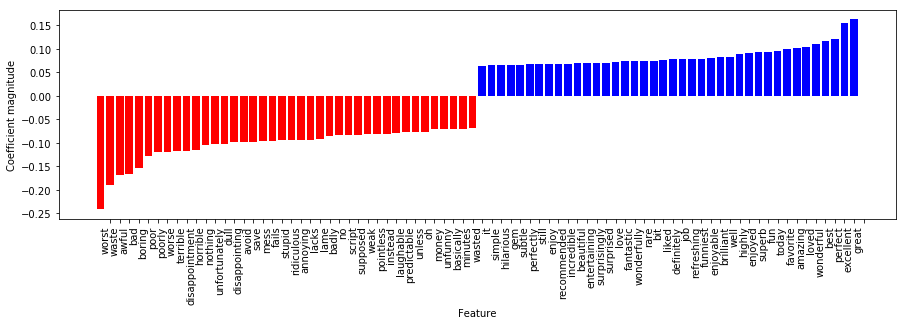

In [77]:
plt.figure(figsize=(15, 5))
colors = ['r' if c < 0 else 'b' for c in coefs[interesting_coefs]]
plt.bar(np.arange(2 * 40), coefs[interesting_coefs], color=colors)
plt.xticks(range(1, 1 + 2 * 40), np.array(feature_names)[interesting_coefs],
           ha='right', rotation=90)
plt.subplots_adjust(bottom=0.3)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.show()

## 7.7 多个单词的词袋（n元分词）

使用词袋表示的主要缺点之一是完全舍弃了单词顺序。使用词袋表示时有一种获取上下文的方法，就是不仅考虑单一词例的计数，而且还考虑相邻的两个或三个词例的计数。

In [78]:
bards_words

['The fool doth think he is wise,',
 'but the wise man knows himself to be a fool']

默认情况下，为每个长度最小为1，最大也为1的词例序列（刚好一个词）创建一个特征：

In [81]:
cv = CountVectorizer(ngram_range=(1, 1)).fit(bards_words)
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabuluary:\n{}".format(cv.get_feature_names()))

Vocabulary size: 13
Vocabuluary:
['be', 'but', 'doth', 'fool', 'he', 'himself', 'is', 'knows', 'man', 'the', 'think', 'to', 'wise']


查看仅二元分词（即仅查看由两个相邻词例组成的序列），设置`ngram_range`为(2, 2):

In [84]:
cv = CountVectorizer(ngram_range=(2, 2)).fit(bards_words)
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabuluary:\n{}".format(cv.get_feature_names()))

Vocabulary size: 14
Vocabuluary:
['be fool', 'but the', 'doth think', 'fool doth', 'he is', 'himself to', 'is wise', 'knows himself', 'man knows', 'the fool', 'the wise', 'think he', 'to be', 'wise man']


In [86]:
print("Transformed data (dense):\n{}".format(cv.transform(bards_words).toarray()))

Transformed data (dense):
[[0 0 1 1 1 0 1 0 0 1 0 1 0 0]
 [1 1 0 0 0 1 0 1 1 0 1 0 1 1]]


In [88]:
print(cv.transform(bards_words))

  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 6)	1
  (0, 9)	1
  (0, 11)	1
  (1, 0)	1
  (1, 1)	1
  (1, 5)	1
  (1, 7)	1
  (1, 8)	1
  (1, 10)	1
  (1, 12)	1
  (1, 13)	1


In [89]:
cv.transform(bards_words)

<2x14 sparse matrix of type '<class 'numpy.int64'>'
	with 14 stored elements in Compressed Sparse Row format>

在bards_words上使用一元分词、二元分词：

In [90]:
cv = CountVectorizer(ngram_range=(1, 2)).fit(bards_words)
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabuluary:\n{}".format(cv.get_feature_names()))

Vocabulary size: 27
Vocabuluary:
['be', 'be fool', 'but', 'but the', 'doth', 'doth think', 'fool', 'fool doth', 'he', 'he is', 'himself', 'himself to', 'is', 'is wise', 'knows', 'knows himself', 'man', 'man knows', 'the', 'the fool', 'the wise', 'think', 'think he', 'to', 'to be', 'wise', 'wise man']


在bards_words上使用一元分词、二元分词和三元分词：

In [92]:
cv = CountVectorizer(ngram_range=(1, 3)).fit(bards_words)
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabuluary:\n{}".format(cv.get_feature_names()))

Vocabulary size: 39
Vocabuluary:
['be', 'be fool', 'but', 'but the', 'but the wise', 'doth', 'doth think', 'doth think he', 'fool', 'fool doth', 'fool doth think', 'he', 'he is', 'he is wise', 'himself', 'himself to', 'himself to be', 'is', 'is wise', 'knows', 'knows himself', 'knows himself to', 'man', 'man knows', 'man knows himself', 'the', 'the fool', 'the fool doth', 'the wise', 'the wise man', 'think', 'think he', 'think he is', 'to', 'to be', 'to be fool', 'wise', 'wise man', 'wise man knows']


在IMDb电影评论数据上使用`TfidfVectorizer`，并利用网格搜索找出n元分词的最佳设置：

In [93]:
pipe = make_pipeline(TfidfVectorizer(min_df=5),
                     LogisticRegression())
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'tfidfvectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]}
grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(text_train, y_train)
print("Best cv score: {:.2f}".format(grid_search.best_score_))
print("Best parameters: \n{}".format(grid_search.best_params_))

Best cv score: 0.91
Best parameters: 
{'logisticregression__C': 1000, 'tfidfvectorizer__ngram_range': (1, 3)}


将交叉验证精度作为`ngram_range`和`C`参数的函数并用热图可视化：

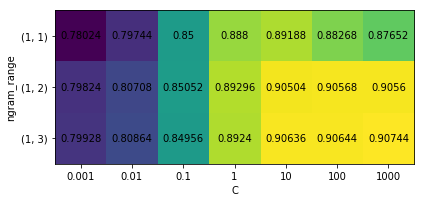

In [99]:
# 从网格搜索中提取分数
scores = grid_search.cv_results_['mean_test_score'].reshape(-1, 3).T

fig, ax = plt.subplots()
im = ax.imshow(scores)

ax.set_xlabel("C")
ax.set_ylabel("ngram_range")
xticklabels = param_grid['logisticregression__C']
yticklabels = param_grid['tfidfvectorizer__ngram_range']
ax.set_xticks(np.arange(len(xticklabels)))
ax.set_yticks(np.arange(len(yticklabels)))
ax.set_xticklabels(xticklabels)
ax.set_yticklabels(yticklabels)

# Loop over data dimensions and create text annotations
for i in range(len(yticklabels)):
    for j in range(len(xticklabels)):
        text = ax.text(j, i, scores[i, j], ha='center', va='center', color='k')
fig.tight_layout()
plt.show()

> 使用二元分词对性能有很大提高，而添加三元分词对精度只有很小贡献。

将最佳模型的重要系数可视化：

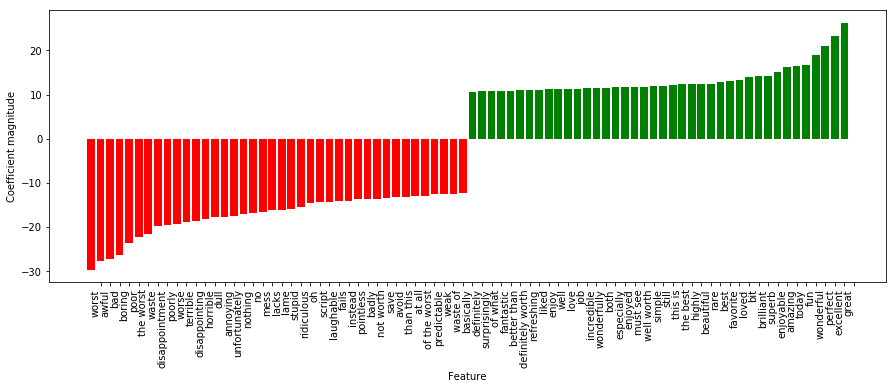

In [105]:
vect = grid_search.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names())
coefs = grid_search.best_estimator_.named_steps['logisticregression'].coef_
coefs = coefs.ravel()
pos_coefs = np.argsort(coefs)[-40:]
neg_coefs = np.argsort(coefs)[:40]
interesting_coefs = np.hstack((neg_coefs, pos_coefs))

plt.figure(figsize=(15, 5))
colors = ['r' if x < 0 else 'g' for x in coefs[interesting_coefs]]
plt.bar(np.arange(2 * 40), coefs[interesting_coefs], color=colors)
plt.xticks(range(1, 1 + 2 * 40), np.array(feature_names[interesting_coefs]),
           ha='right', rotation=90)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.show()

> 同时使用tf-idf缩放与一元分词、二元分词和三元分词时的特征（最重要和最不重要）

只将三元分词可视化：

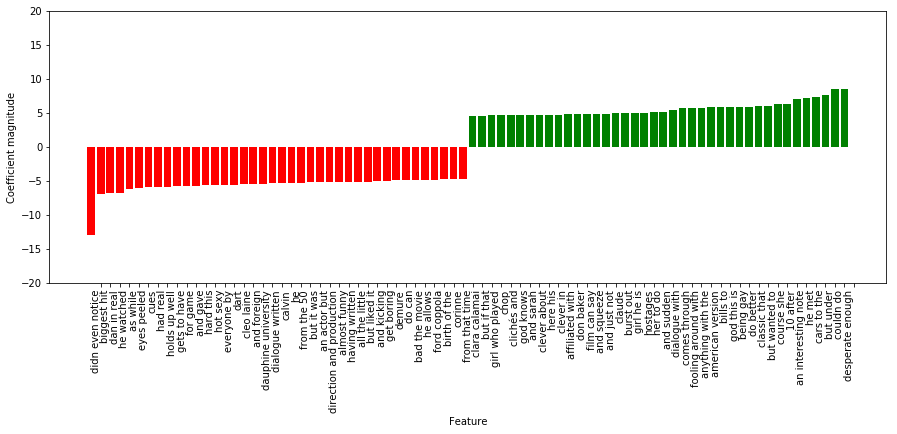

In [114]:
vect = grid_search.best_estimator_.named_steps['tfidfvectorizer']
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 3
feature_names = feature_names[mask]
feature_names = np.array(vect.get_feature_names())
coefs = grid_search.best_estimator_.named_steps['logisticregression'].coef_
coefs = coefs.ravel()[mask]
pos_coefs = np.argsort(coefs)[-40:]
neg_coefs = np.argsort(coefs)[:40]
interesting_coefs = np.hstack((neg_coefs, pos_coefs))

plt.figure(figsize=(15, 5))
colors = ['r' if x < 0 else 'g' for x in coefs[interesting_coefs]]
plt.bar(np.arange(2 * 40), coefs[interesting_coefs], color=colors)
plt.xticks(range(1, 1 + 2 * 40), np.array(feature_names[interesting_coefs]),
           ha='right', rotation=90)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.ylim((-20, 20))
plt.show()

> 许多有用的二元分词和三元分词都由常见的单词组成，这些单词本身可能没有什么信息量。  
与一元分词重要的特征性相比，这些特征（三元分词）的影响非常有限。

## 7.8 高级分词、词干提取与词形还原

## 7.9 主题建模与文档聚类

**主题建模（topic modeling）**是描述将每个文档分配给一个或多个主题的任务（通常是无监督的）的概括性术语。如果为每个文档分配一个主题，那么这是一个文档聚类任务。如果每个文档可以有多个主题，那么这个任务与分解方法（PCA、NMF等）有关。学到的每个成分对应一个主题，文档表示中的成分系数告诉我们这个文档与该主题的相关性强弱。通常来说，在谈论主题建模时，指的是一种叫做**隐含狄利克雷分布（Latent Dirichlet Allocation, LDA）**的特定分布。

直观上来看，LDA模型试图找出频繁共同出现的单词群组（即主题）。LDA还要求，每个文档可以被理解为主题子集的“混合”。

对于无监督的文本文档模型，通常最好删除非常常见的单词，否则它们可能会支配分析过程。

将LDA应用于电影评论集：

删除至少在15%文档中出现过的单词，并在删除前15%之后，将词袋模型限定为最常见的10000个单词：

In [122]:
vect = CountVectorizer(max_features=10000, max_df=0.15)
X = vect.fit_transform(text_train)

In [124]:
X

<25000x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 1948677 stored elements in Compressed Sparse Row format>

学习一个包含10个主题的主题模型：

In [126]:
from sklearn.decomposition import LatentDirichletAllocation

# 使用batch方法，比online(默认)稍慢，但给出更好的结果
# 增大max_iter，会得到更好的模型
lda = LatentDirichletAllocation(n_components=10, learning_method='batch',
                                max_iter=25, random_state=0)
document_topics = lda.fit_transform(X)

lda.components_属性保存了每个单词对每个主题的重要性：

In [129]:
lda.components_.shape  # (n_topics, n_words)

(10, 10000)

In [130]:
lda.components_

array([[  1.00008486e-01,   1.00013189e-01,   2.92462887e+02, ...,
          1.00008441e-01,   1.00001041e-01,   1.00011322e-01],
       [  1.00023754e-01,   7.38846180e+01,   1.23643614e+02, ...,
          1.00038364e-01,   1.00008016e-01,   4.10997933e+01],
       [  1.54089717e+01,   3.09788112e+01,   8.86029433e+02, ...,
          2.17772720e+00,   1.00006122e-01,   1.00005977e-01],
       ..., 
       [  1.60452574e-01,   7.44217167e+00,   5.19173853e+01, ...,
          1.00022325e-01,   5.90999435e+01,   1.00012920e-01],
       [  1.48224257e+00,   7.02425119e+00,   2.38128005e+02, ...,
          3.60839141e-01,   1.00002324e-01,   1.00000197e-01],
       [  2.85702750e+01,   1.17810172e+02,   1.42082626e+02, ...,
          7.78326414e+00,   1.00006686e-01,   1.00002372e-01]])

查看每个主题中最重要的单词(前10个）：

In [141]:
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())

for i in range(lda.n_components):
    print("topic {}:".format(i))
    print(feature_names[sorting[i, :10]], "\n")

topic 0:
['between' 'young' 'family' 'real' 'performance' 'beautiful' 'work' 'each'
 'both' 'director'] 

topic 1:
['war' 'world' 'us' 'our' 'american' 'documentary' 'history' 'new' 'own'
 'point'] 

topic 2:
['funny' 'worst' 'comedy' 'thing' 'guy' 're' 'stupid' 'actually' 'nothing'
 'want'] 

topic 3:
['show' 'series' 'episode' 'tv' 'episodes' 'shows' 'season' 'new'
 'television' 'years'] 

topic 4:
['didn' 'saw' 'am' 'thought' 'years' 'book' 'watched' 'now' 'dvd' 'got'] 

topic 5:
['horror' 'action' 'effects' 'budget' 'nothing' 'original' 'director'
 'minutes' 'pretty' 'doesn'] 

topic 6:
['kids' 'action' 'animation' 'game' 'fun' 'disney' 'children' '10' 'kid'
 'old'] 

topic 7:
['cast' 'role' 'john' 'version' 'novel' 'both' 'director' 'played'
 'performance' 'mr'] 

topic 8:
['performance' 'role' 'john' 'actor' 'oscar' 'cast' 'plays' 'jack' 'joe'
 'performances'] 

topic 9:
['house' 'woman' 'gets' 'killer' 'girl' 'wife' 'horror' 'young' 'goes'
 'around'] 



> 仅使用10个主题，每个主题都需要非常宽泛，才能共同涵盖数据集中所有不同类型的评论。

学习一个包含100个主题的模型：

In [142]:
lda_100_components = LatentDirichletAllocation(n_components=100,
                                               learning_method='batch',
                                               max_iter=25, random_state=0)
document_100_topics = lda_100_components.fit_transform(X)

In [148]:
document_100_topics.shape  # (n_documents, n_topics)

(25000, 100)

In [149]:
topics = np.array([7, 16, 24, 25, 28, 36, 37, 41, 45, 51, 53, 54, 63, 89, 97])

sorting = np.argsort(lda_100_components.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
for i in topics:
    print("topic i: {}".format(i))
    print(feature_names[sorting[i, :20]], '\n')

topic i: 7
['thriller' 'suspense' 'horror' 'atmosphere' 'mystery' 'house' 'director'
 'quite' 'bit' 'de' 'performances' 'dark' 'twist' 'hitchcock' 'tension'
 'interesting' 'mysterious' 'murder' 'ending' 'creepy'] 

topic i: 16
['worst' 'awful' 'boring' 'horrible' 'stupid' 'thing' 'terrible' 'script'
 'nothing' 'worse' 'waste' 'pretty' 'minutes' 'didn' 'actors' 'actually'
 're' 'supposed' 'mean' 'want'] 

topic i: 24
['german' 'hitler' 'nazi' 'midnight' 'joe' 'germany' 'years' 'history'
 'new' 'modesty' 'cowboy' 'jewish' 'past' 'kirk' 'young' 'spanish'
 'enterprise' 'von' 'nazis' 'spock'] 

topic i: 25
['car' 'gets' 'guy' 'around' 'down' 'kill' 'goes' 'killed' 'going' 'house'
 'away' 'head' 'take' 'another' 'getting' 'doesn' 'now' 'night' 'right'
 'woman'] 

topic i: 28
['beautiful' 'young' 'old' 'romantic' 'between' 'romance' 'wonderful'
 'heart' 'feel' 'year' 'each' 'french' 'sweet' 'boy' 'loved' 'girl'
 'relationship' 'saw' 'both' 'simple'] 

topic i: 36
['performance' 'role' 'actor'

> 使用更多的主题，将使得分析过程更加困难，但更可能使主题专门针对于某个有趣的数据子集。

**想要利用发现的主题做出进一步的推断，应该查看分配给这些主题的文档，以验证通过查看每个主题排名最靠前的单词所得到的直觉。**

主题45似乎是关于音乐的，查看哪些评论被分配给这个主题：

In [157]:
# 按主题45进行排序
music = np.argsort(document_100_topics[:, 45])[::-1]
# Print the five documents where the topic is most important
for i in music[:10]:
    # 显示前两个句子
    print(b".".join(text_train[i].split(b".")[:2]) + b'.\n')

b'I love this movie and never get tired of watching. The music in it is great.\n'
b"I enjoyed Still Crazy more than any film I have seen in years. A successful band from the 70's decide to give it another try.\n"
b'Hollywood Hotel was the last movie musical that Busby Berkeley directed for Warner Bros. His directing style had changed or evolved to the point that this film does not contain his signature overhead shots or huge production numbers with thousands of extras.\n'
b"What happens to washed up rock-n-roll stars in the late 1990's? They launch a comeback / reunion tour. At least, that's what the members of Strange Fruit, a (fictional) 70's stadium rock group do.\n"
b'As a big-time Prince fan of the last three to four years, I really can\'t believe I\'ve only just got round to watching "Purple Rain". The brand new 2-disc anniversary Special Edition led me to buy it.\n'
b"This film is worth seeing alone for Jared Harris' outstanding portrayal of John Lennon. It doesn't matter that H

**查看主题**还有一种有趣的方法，就是**通过对所有评论的`document_topics`进行求和来查看每个主题所获得的整体权重**。

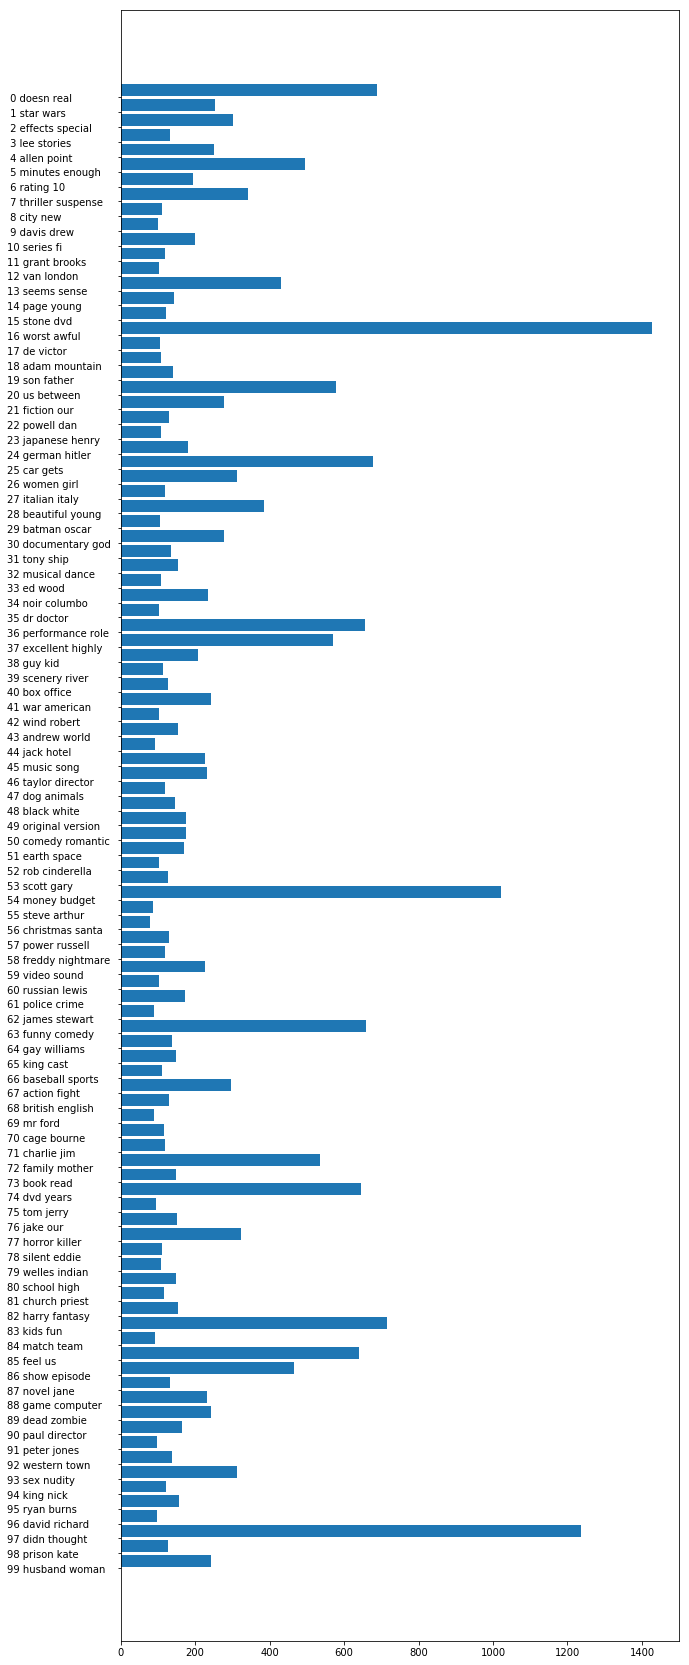

In [166]:
fig, ax = plt.subplots(figsize=(10, 30))
topic_names = ["{:>2} ".format(i) + " ".join(words)
               for i, words in enumerate(feature_names[sorting[:, :2]])]
plt.barh(np.arange(100), np.sum(document_100_topics, axis=0))
plt.yticks(np.arange(100) + 0.5, topic_names, ha="left")
ax = plt.gca()
ax.invert_yaxis()
yax = ax.get_yaxis()
yax.set_tick_params(pad=110)

> LDA似乎主要发现了两种主题：特定类型的主题与特定评分的主题。